In [85]:
#importando bibliotecas padrão
import pandas as pd
from datetime import datetime
from validate_docbr import CPF
import matplotlib.pyplot as plt

In [86]:
df_ds = pd.read_csv("/home/lucasmateus/dbt-projects/projetos_lucas/crm/estudo_campanhas/campanhas/telemedicina/fev_24/ds_telemed_fev_24_pacientes_feegow.csv")

/tmp/ipykernel_37842/2321997969.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ds = pd.read_csv("/home/lucasmateus/dbt-projects/projetos_lucas/crm/estudo_campanhas/campanhas/telemedicina/fev_24/ds_telemed_fev_24_pacientes_feegow.csv")


In [87]:
df_ds.head(1)

,id_paciente,cpf,email,nm_paciente,dt_criacao,dt_agendamento,qtd_agendamentos,nm_especialidade,nm_canal,id_paciente.1,...,tabela_mais_utilizada,media_dias_entre_consultas,flag_filiado,flag_titular,dependentes,flag_desfiliado,flag_refiliado,score_r,score_f,score_v
0,15709803,"30,277,734,886",NaN,CLEIDINEIA MENDES DE ALMEIDA,2024-02-02 17:55:23.000,2024-02-16,1,Ginecologia,Clínica,"15,709,803",...,Cartão de TODOS,81,1,1,9,1,1,3,2,4


In [88]:
df_crm = pd.read_excel('/home/lucasmateus/dbt-projects/projetos_lucas/crm/estudo_campanhas/campanhas/telemedicina/fev_24/envios_telemed_fev_24.xlsx')

In [89]:
# Tratativas base CRM
df_crm.rename(columns={'E-mail': 'email', 'CPF': 'cpf', 'ID do Paciente': 'id_paciente'}, inplace=True)
# df_crm = df_crm[['id_paciente', 'email', 'cpf']] 
df_crm = df_crm[['id_paciente', 'email', 'cpf', 'tabela']] # INSERIR TABELA SE BASES VIEREM SEGMENTADAS EM CDT E PARTICULAR!!!
df_crm['cpf'] = df_crm['cpf'].str.replace('[.-]', '', regex=True)

In [90]:
df_crm

,id_paciente,email,cpf,tabela
0,NaN,valcimar2010@hotmail.com,00702778699,Cartão de TODOS
1,NaN,sbraydminori@hotmail.com,39952258291,Cartão de TODOS
2,NaN,magalanjos22@gmail.com,03345144441,Cartão de TODOS
3,NaN,larissasantosh17@gmail.com,23961264821,Cartão de TODOS
4,NaN,eugeniaribeirodasilvamourabrit@gmail.com,00778328171,Cartão de TODOS
...,...,...,...,...
7139,NaN,claudiocunha7098@gmail.com,64209130478,Particular
7140,"56,734,912",ketynico@hotmail.com,27741257072,Particular
7141,NaN,marigomessoaressoares@gmail.com,60262397072,Particular
7142,NaN,ednasil202@gmail.com,32492965899,Particular


In [91]:
# Segmenting df_crm based on 'id_paciente' and 'cpf' columns
df_crm_id = df_crm[df_crm['id_paciente'].notnull()]
df_crm_seg = df_crm[df_crm['id_paciente'].isnull()]
df_crm_cpf = df_crm_seg[df_crm_seg['cpf'].notnull()]
df_crm_email = df_crm_seg[df_crm_seg['cpf'].isnull()]

# Resetting index for all dataframes
df_crm_id.reset_index(drop=True, inplace=True)
df_crm_cpf.reset_index(drop=True, inplace=True)
df_crm_email.reset_index(drop=True, inplace=True)

In [92]:
# Merging df_crm_id with df_ds on 'id_paciente'
df_merged_id = pd.merge(df_crm_id, df_ds, on='id_paciente', how='inner', suffixes=('', '_ag'))

# Merging df_crm_cpf with df_ds on 'cpf'
df_merged_cpf = pd.merge(df_crm_cpf, df_ds, on='cpf', how='inner', suffixes=('', '_ag'))

# Merging df_crm_email with df_ds on 'email'
df_merged_email = pd.merge(df_crm_email, df_ds, on='email', how='inner', suffixes=('', '_ag'))

In [93]:
# Dropping duplicated columns from the merged dataframes
df_merged_id = df_merged_id.loc[:, ~df_merged_id.columns.str.endswith('_ag')]
df_merged_cpf = df_merged_cpf.loc[:, ~df_merged_cpf.columns.str.endswith('_ag')]
df_merged_email = df_merged_email.loc[:, ~df_merged_email.columns.str.endswith('_ag')]

In [94]:
# Concatenating the merged dataframes
df_final = pd.concat([df_merged_id, df_merged_cpf, df_merged_email])
df_final.reset_index(drop=True, inplace=True)

In [95]:
len(df_merged_id)

340

In [96]:
len(df_merged_cpf)

10

In [97]:
len(df_merged_email)

0

In [98]:
# Drop the 'id_paciente.1' column from df_final
df_final.drop('id_paciente.1', axis=1, inplace=True)

# Define age bins and labels
age_bins = [0, 19, 24, 29, 34, 39, 44, 49, 54, 59, float('inf')]
age_labels = ['A: 0-18', 'B: 19-23', 'C: 24-28', 'D: 29-33', 'E: 34-38', 'F: 39-43', 'G: 44-48', 'H: 49-53', 'I: 54-58', 'J: 59+']

# Add a new column 'faixa_etaria' based on 'idade' column in df_final
df_final['faixa_etaria'] = pd.cut(df_final['idade'], bins=age_bins, labels=age_labels, right=False)




In [102]:
# df_final.describe().transpose()
df_final.columns


Index(['id_paciente', 'email', 'cpf', 'tabela', 'nm_paciente', 'dt_criacao',
       'dt_agendamento', 'qtd_agendamentos', 'nm_especialidade', 'nm_canal',
       'cpfpaciente', 'min_dt_pg', 'max_dt_pg', 'meses_utilizacao',
       'dias_desde_ult_utilizacao', 'meses_desde_ult_utilizacao', 'idade',
       'sexo', 'estado_civil', 'qtd_consultas', 'qtd_exam_proc', 'tt_consulta',
       'tm_consulta', 'tt_exam_proc', 'qtd_orc_nao_exec', 'tt_orc_nao_exec',
       'qtd_propostas_exec', 'tt_propostas_exec', 'tm_utilizacao',
       'especialiade_mais_utilizada', 'tabela_mais_utilizada',
       'media_dias_entre_consultas', 'flag_filiado', 'flag_titular',
       'dependentes', 'flag_desfiliado', 'flag_refiliado', 'score_r',
       'score_f', 'score_v', 'faixa_etaria'],
      dtype='object')

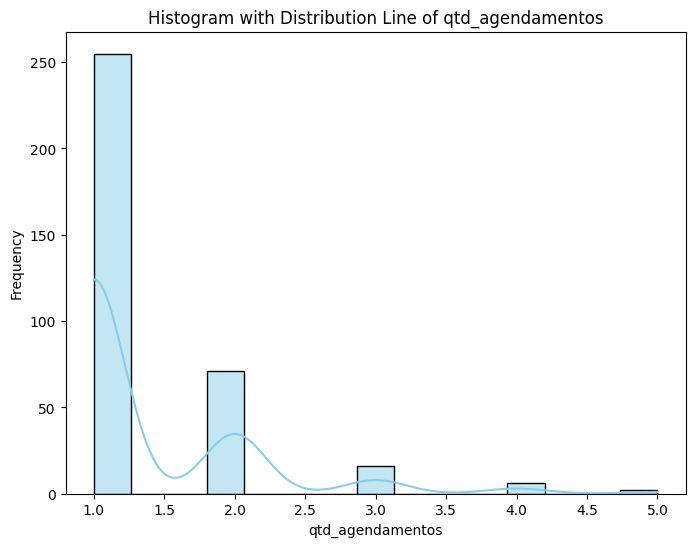

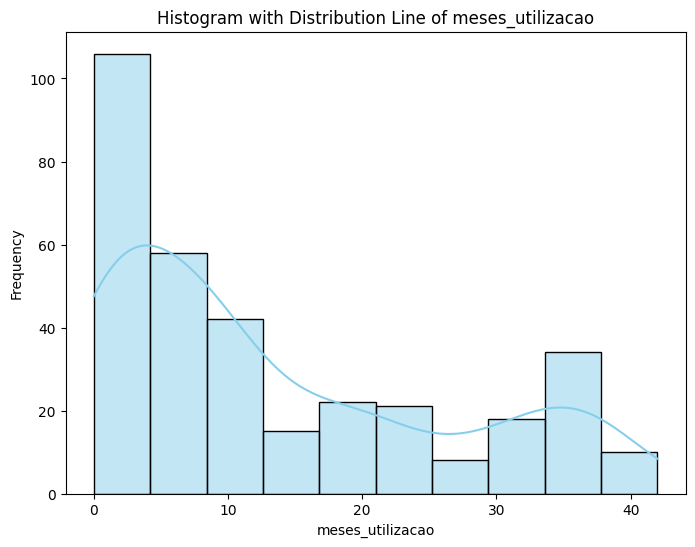

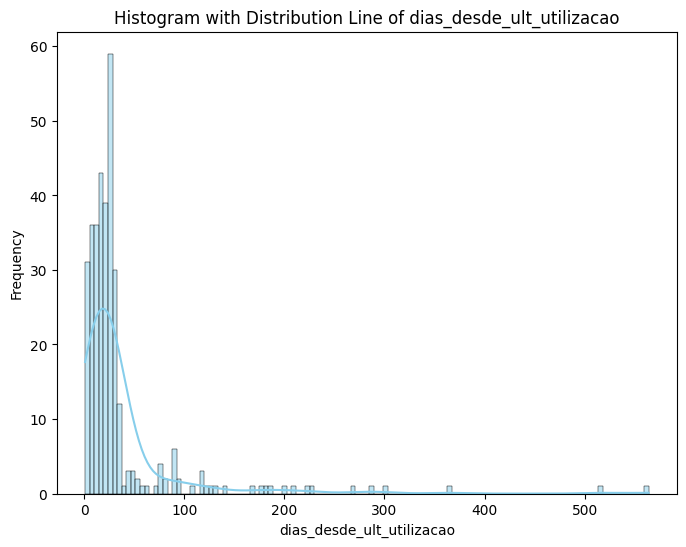

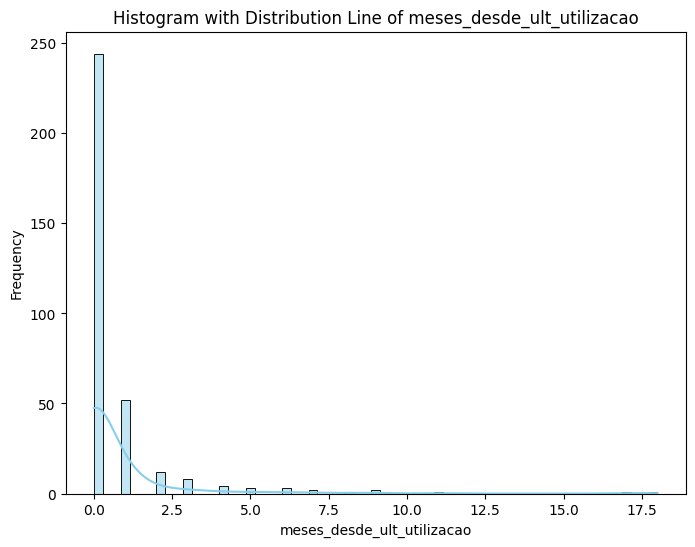

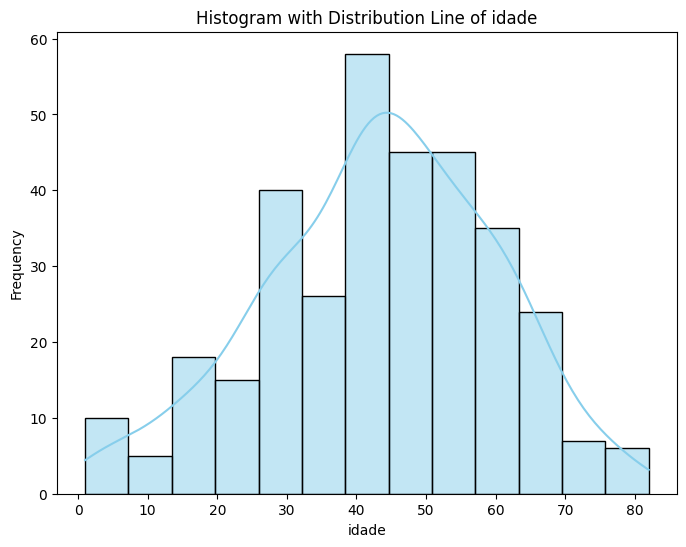

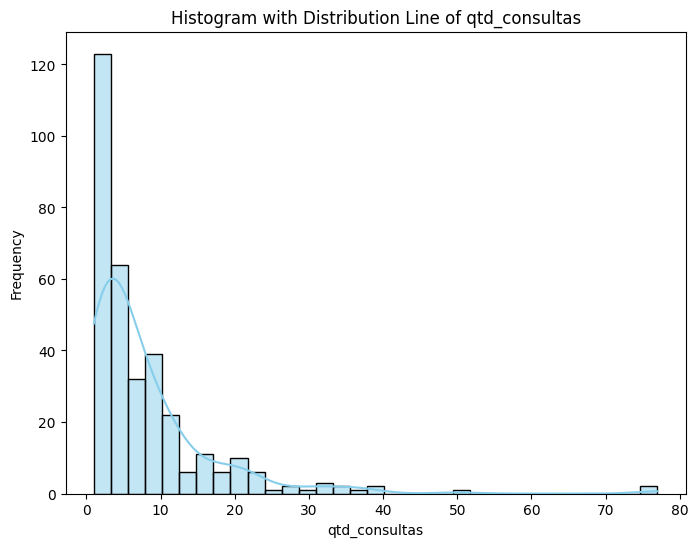

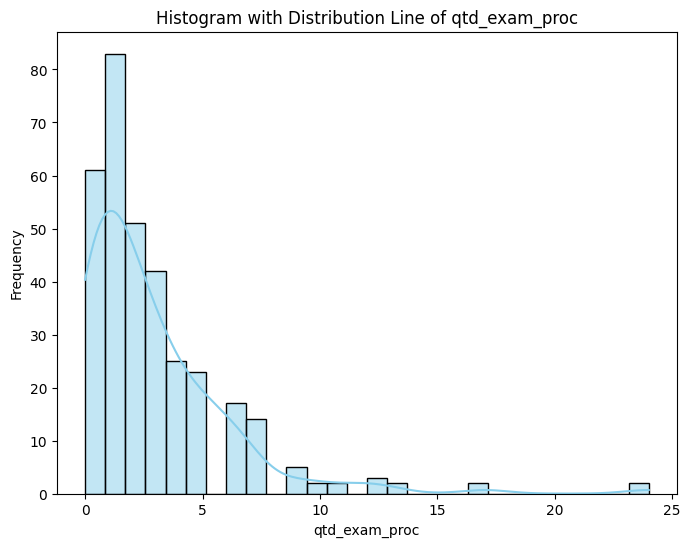

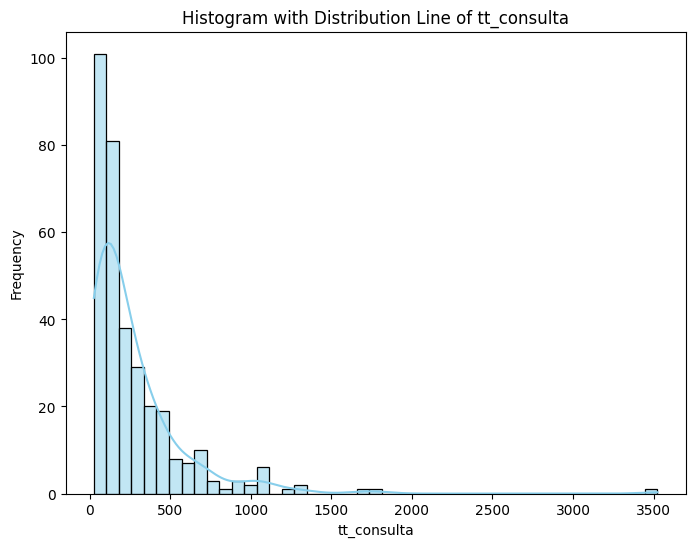

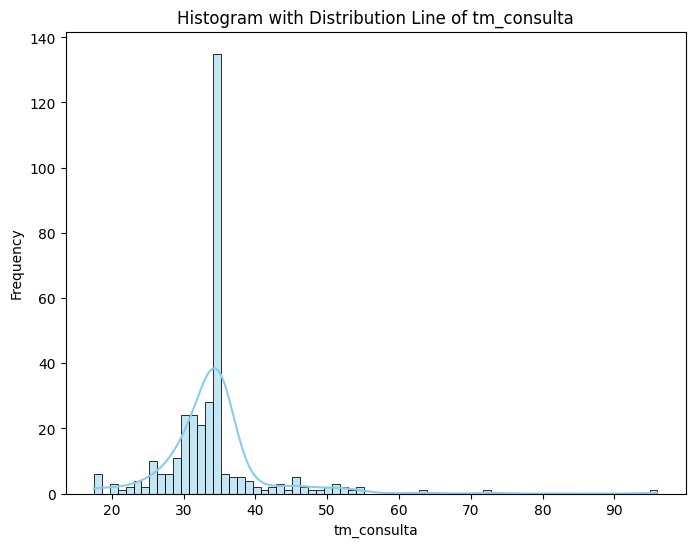

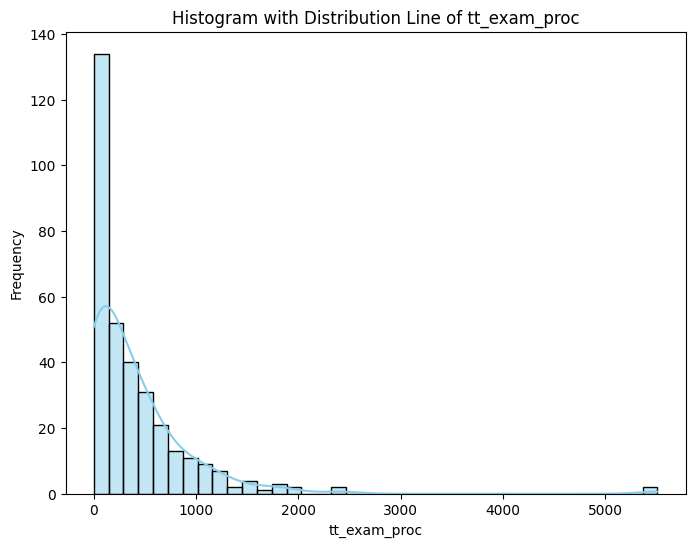

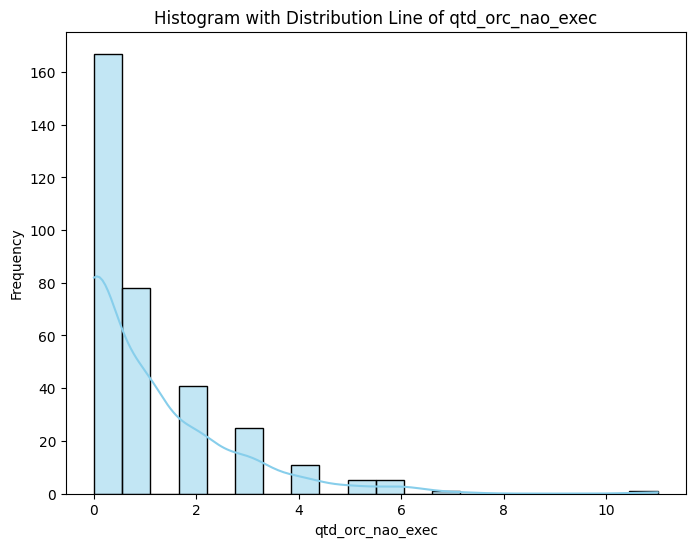

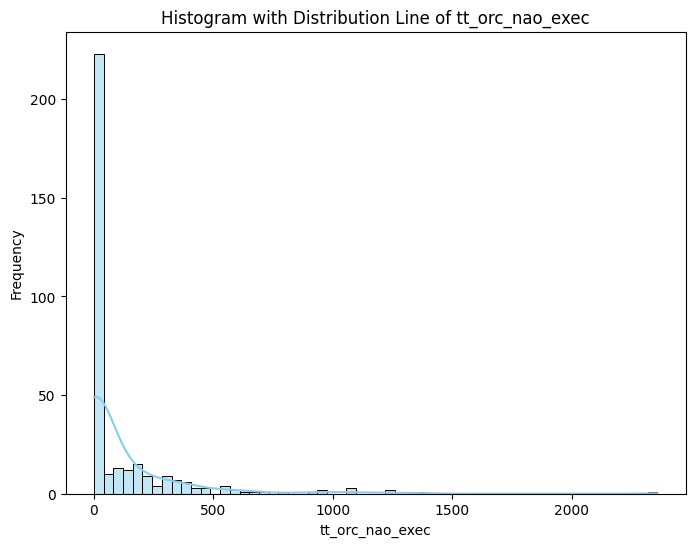

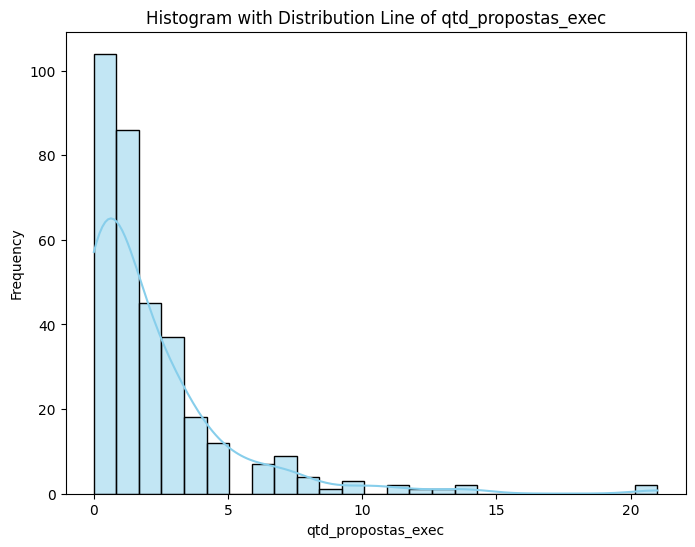

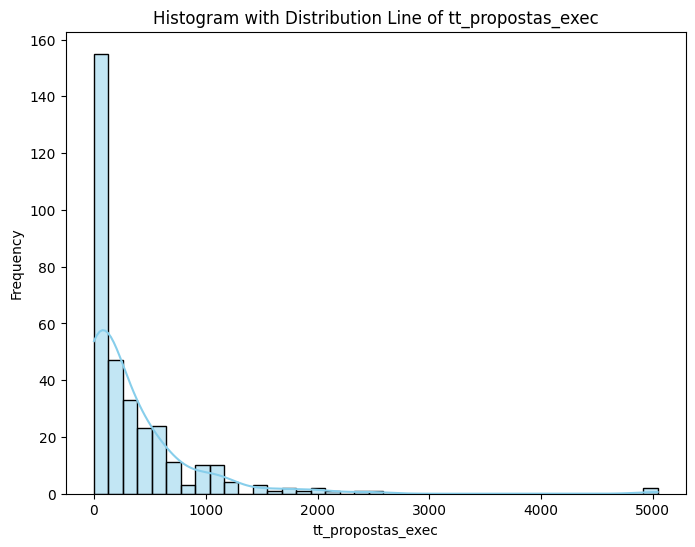

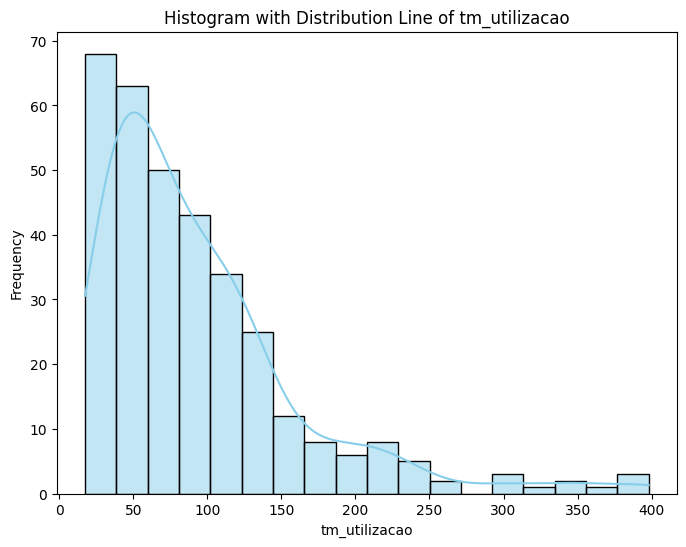

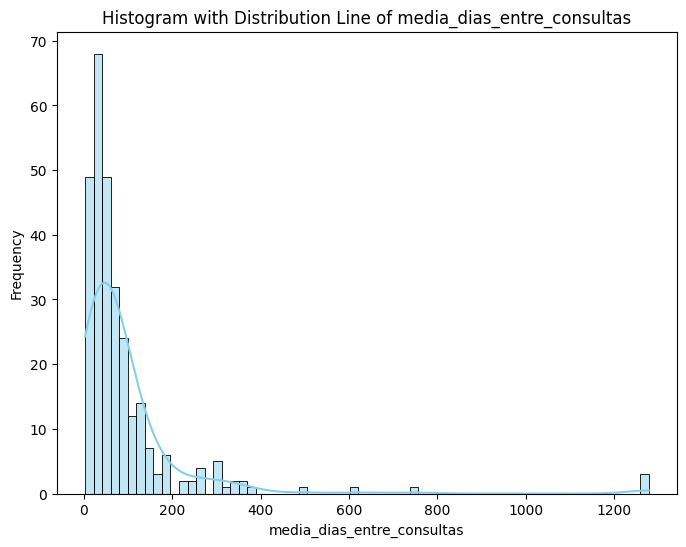

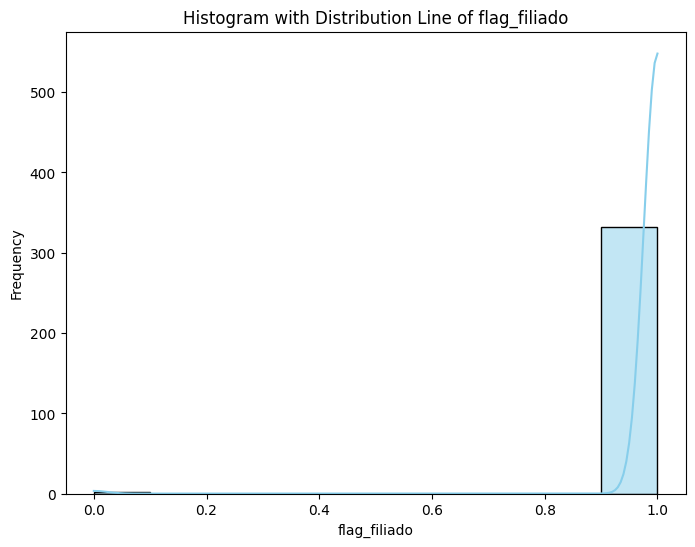

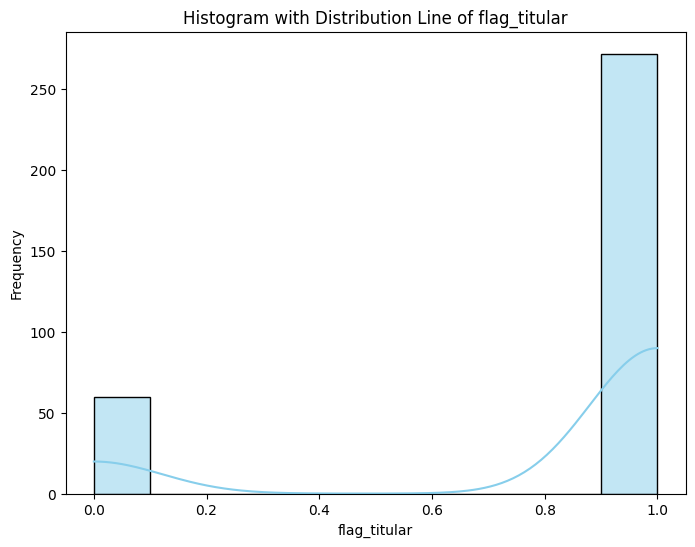

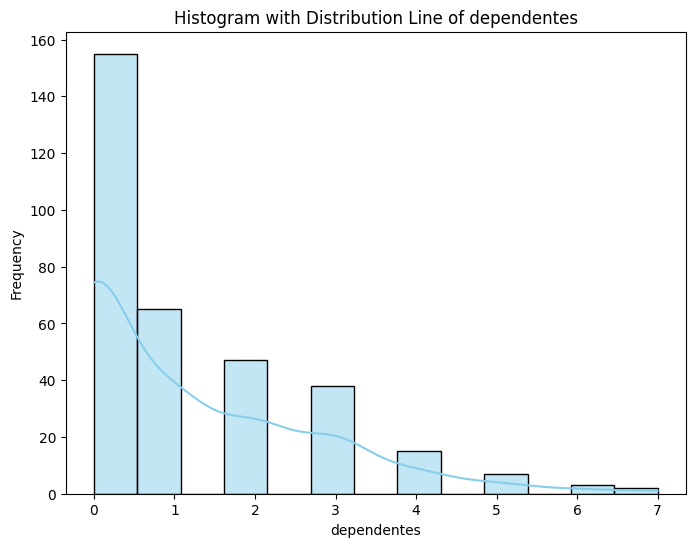

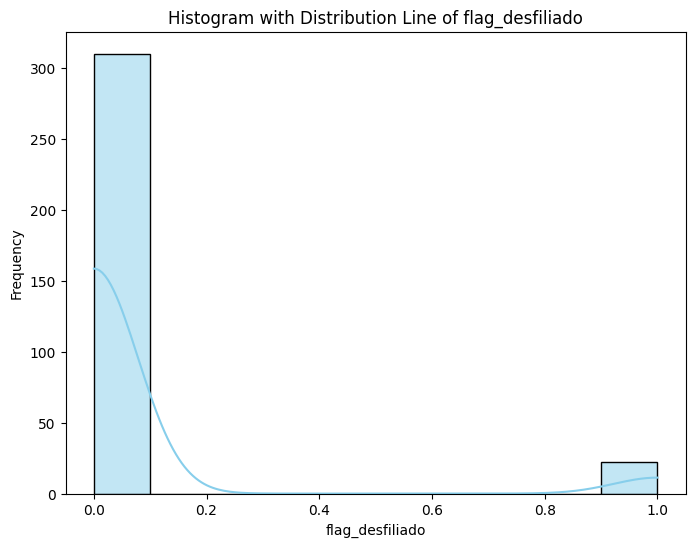

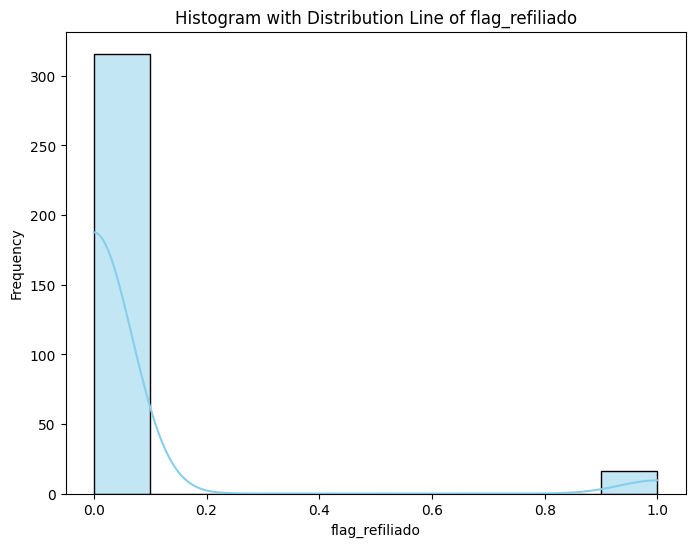

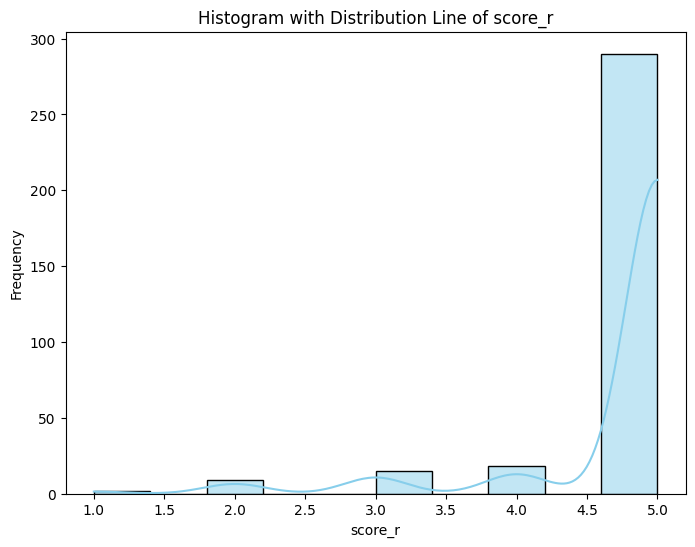

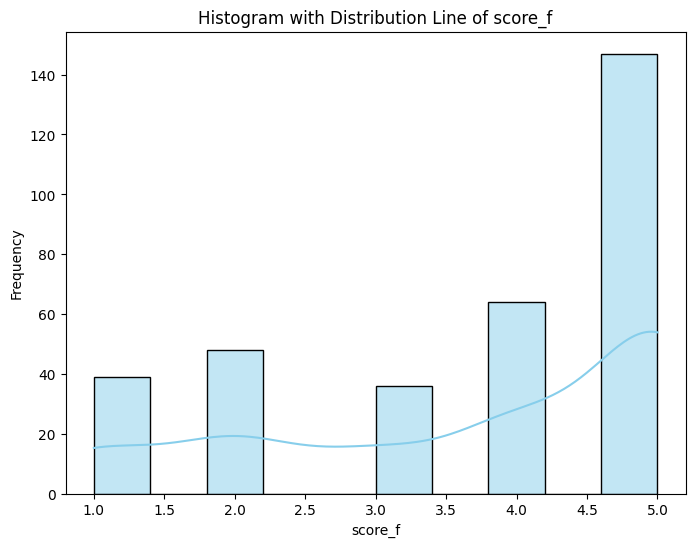

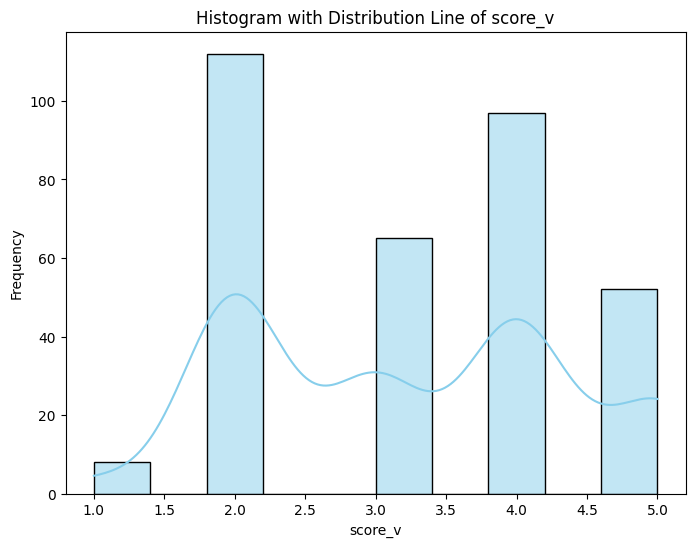

In [100]:
import seaborn as sns

# Select numeric columns excluding the ID columns
numeric_columns = df_final.select_dtypes(include=['float64', 'int64']).columns.drop(['id_paciente'])

# Plot histograms with distribution lines for each numeric column using seaborn
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_final[column], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram with Distribution Line of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

/tmp/ipykernel_37842/1743101606.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_corr.corr()


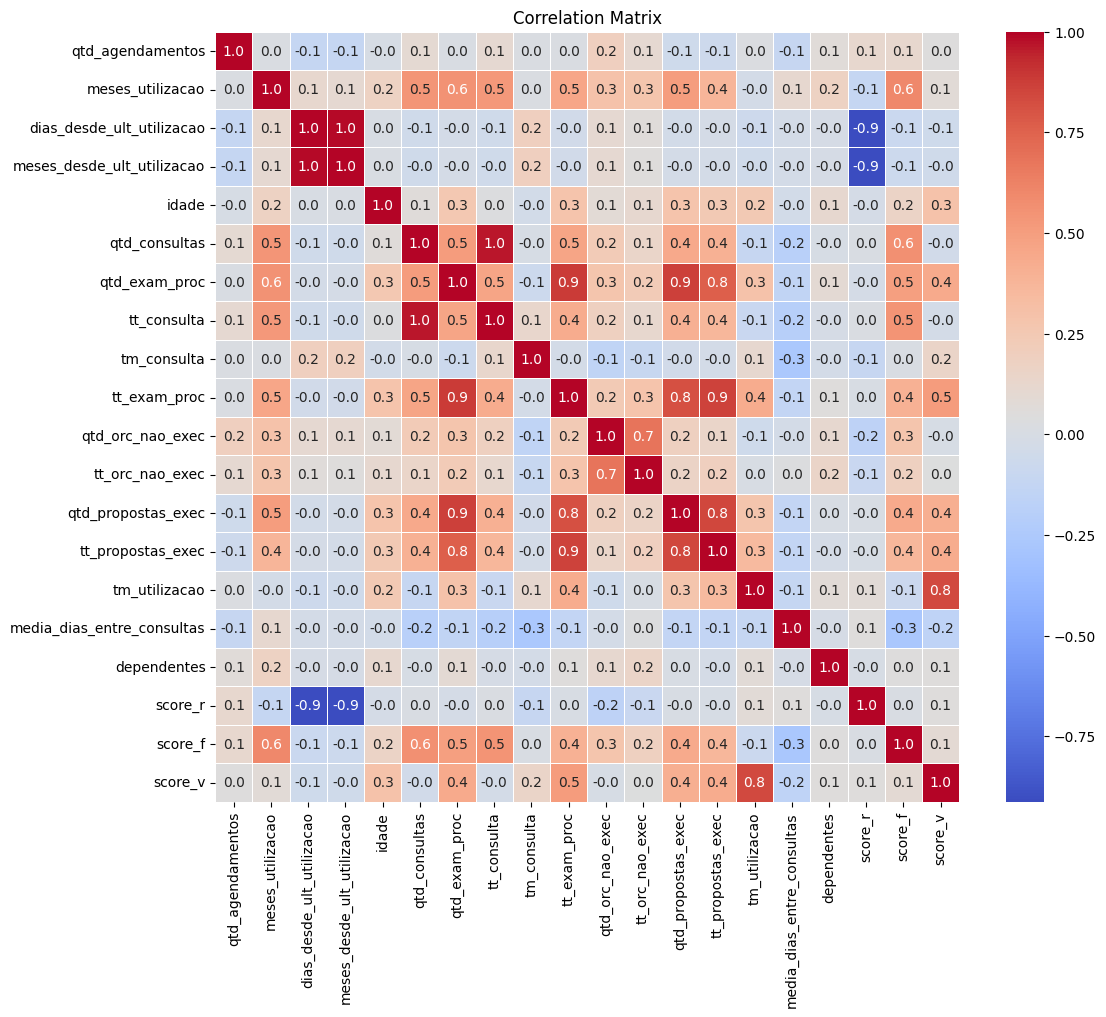

In [101]:
# Drop 'id_paciente' and all 'flag' columns from df_final
columns_to_drop = ['id_paciente'] + [col for col in df_final.columns if 'flag' in col]
df_corr = df_final.drop(columns_to_drop, axis=1)

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the correlation matrix using seaborn's heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

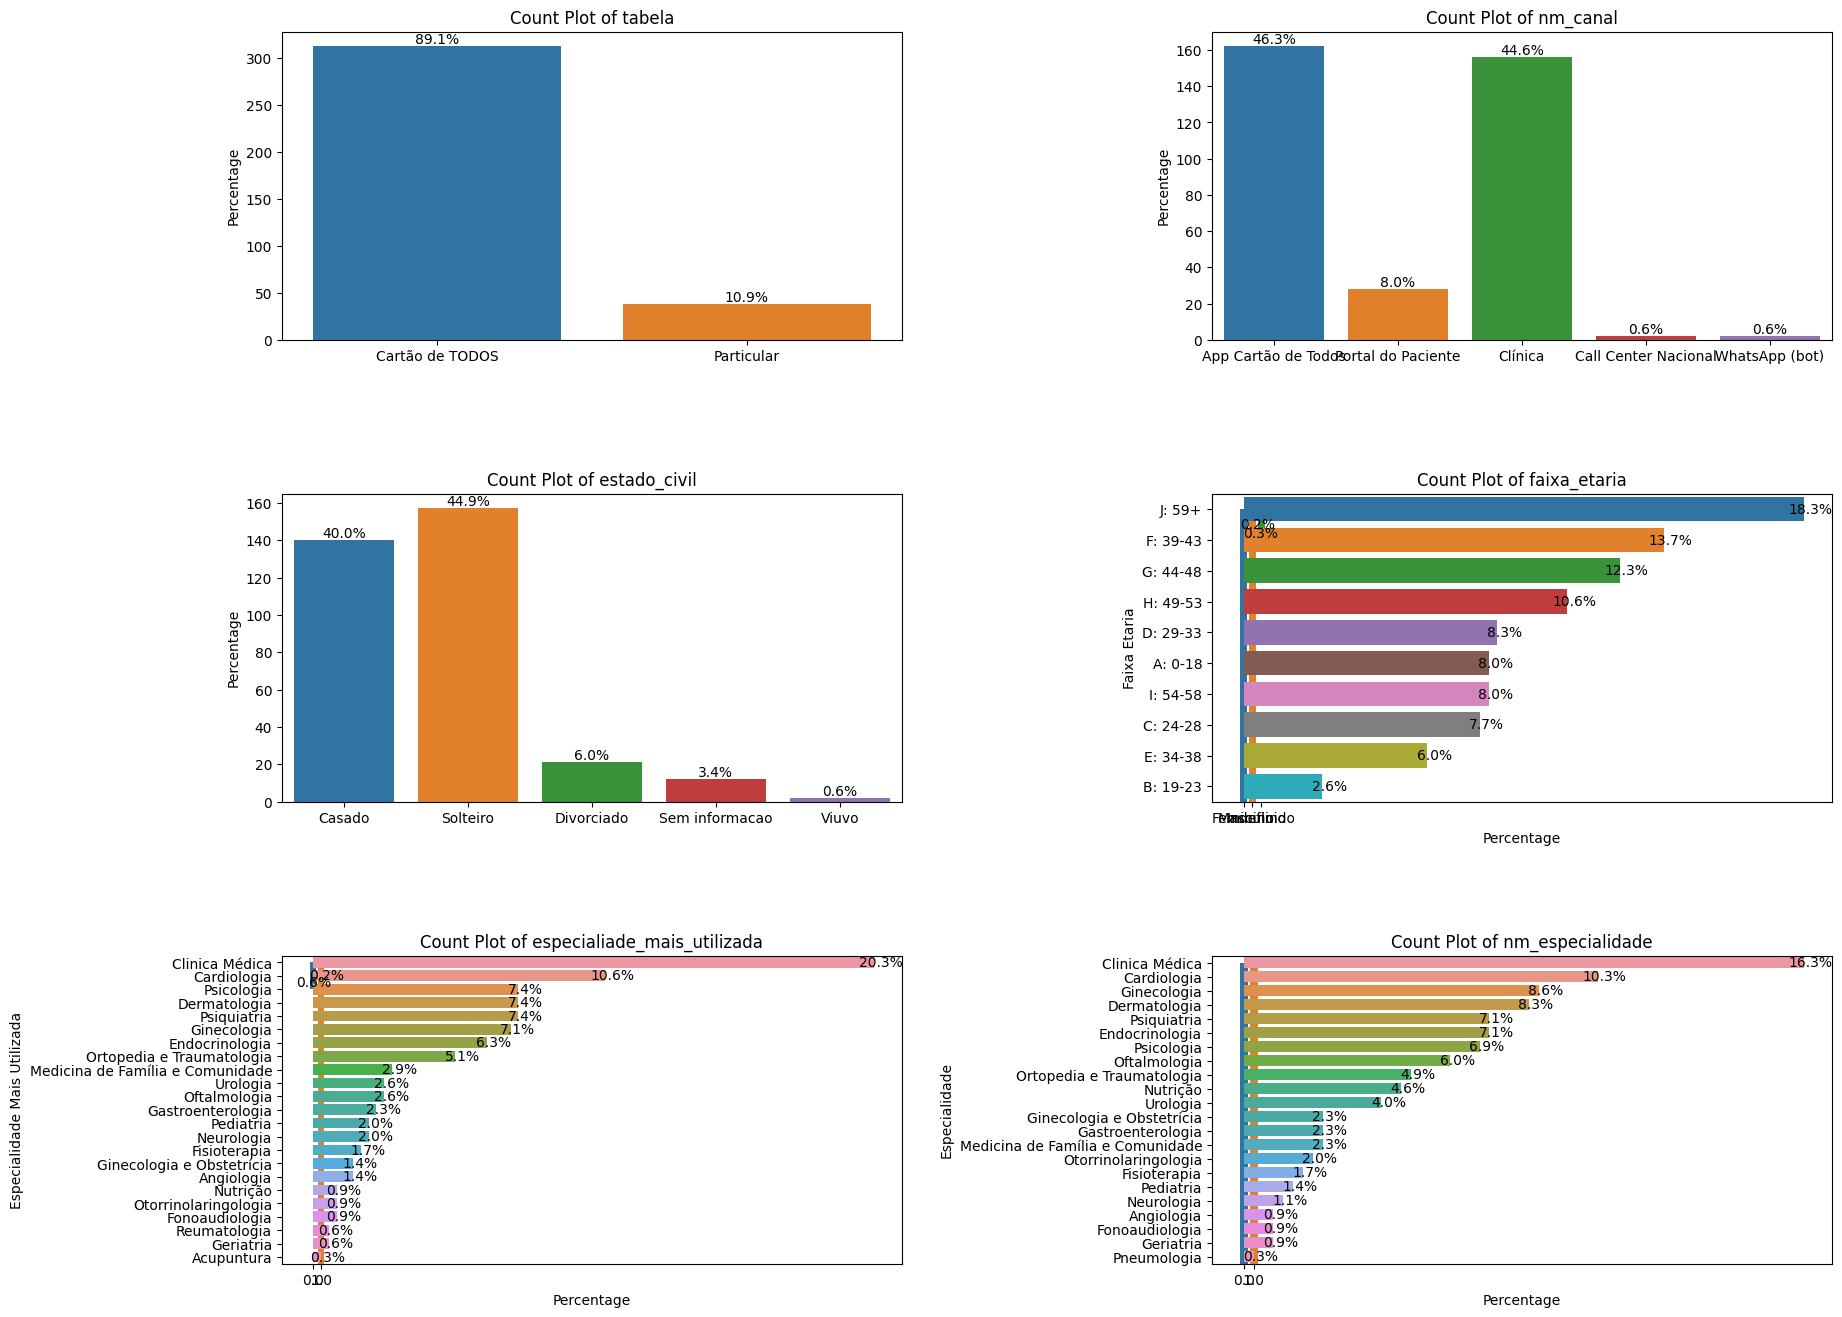

In [110]:
# Define the categorical columns
categorical_columns = ['tabela', 'nm_canal', 'estado_civil', 'sexo', 'flag_filiado', 'flag_titular']

# Set up the matplotlib figure with larger size
plt.figure(figsize=(20, 16))

# Plot count plots for each categorical column using seaborn
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    ax = sns.countplot(data=df_final, x=column)
    plt.title(f'Count Plot of {column}')
    plt.xlabel('')
    plt.ylabel('Percentage')
    total = float(len(df_final[column]))
    for p in ax.patches:
        height = p.get_height()
        ax.annotate('{:.1f}%'.format((height / total) * 100), 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', 
                     xytext=(0, 5), 
                     textcoords='offset points')

# Plot lateral bar charts for specific columns
plt.subplot(3, 2, 6)
ax = sns.countplot(data=df_final, y='nm_especialidade', order=df_final['nm_especialidade'].value_counts().index)
plt.title('Count Plot of nm_especialidade')
plt.xlabel('Percentage')
plt.ylabel('Especialidade')
total = float(len(df_final['nm_especialidade']))
for p in ax.patches:
    width = p.get_width()
    ax.annotate('{:.1f}%'.format((width / total) * 100), 
                 (width, p.get_y() + p.get_height() / 2.), 
                 ha='center', va='center', 
                 xytext=(5, 0), 
                 textcoords='offset points')

plt.subplot(3, 2, 5)
ax = sns.countplot(data=df_final, y='especialiade_mais_utilizada', order=df_final['especialiade_mais_utilizada'].value_counts().index)
plt.title('Count Plot of especialiade_mais_utilizada')
plt.xlabel('Percentage')
plt.ylabel('Especialidade Mais Utilizada')
total = float(len(df_final['especialiade_mais_utilizada']))
for p in ax.patches:
    width = p.get_width()
    ax.annotate('{:.1f}%'.format((width / total) * 100), 
                 (width, p.get_y() + p.get_height() / 2.), 
                 ha='center', va='center', 
                 xytext=(5, 0), 
                 textcoords='offset points')

plt.subplot(3, 2, 4)
ax = sns.countplot(data=df_final, y='faixa_etaria', order=df_final['faixa_etaria'].value_counts().index)
plt.title('Count Plot of faixa_etaria')
plt.xlabel('Percentage')
plt.ylabel('Faixa Etaria')
total = float(len(df_final['faixa_etaria']))
for p in ax.patches:
    width = p.get_width()
    ax.annotate('{:.1f}%'.format((width / total) * 100), 
                 (width, p.get_y() + p.get_height() / 2.), 
                 ha='center', va='center', 
                 xytext=(5, 0), 
                 textcoords='offset points')

# Adjust layout
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show the plots
plt.show()